In [2]:
!pip install ultralytics opencv-python pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

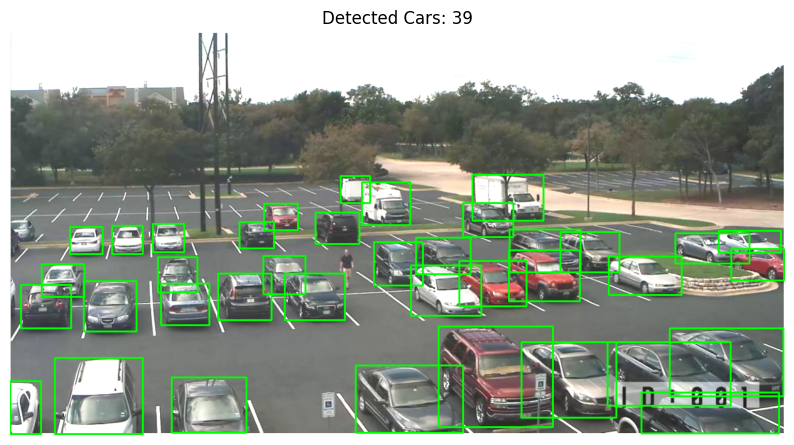

   Total Slots  Occupied Slots  Available Slots
0          135              39               96


In [24]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the better YOLO model
model = YOLO("yolov8x.pt")

# Read and enhance the image
image_path = "Parking_lot.png"
img = cv2.imread(image_path)
img = cv2.convertScaleAbs(img, alpha=1.3, beta=30)  # Brighten image
cv2.imwrite("Bright_parking.jpg", img)

# Run YOLO
results = model.predict("Bright_parking.jpg", conf=0.12, iou=0.4, verbose=False)
boxes = results[0].boxes.data.cpu().numpy()

# Filter boxes by class and confidence
car_boxes = []
for box in boxes:
    x1, y1, x2, y2, score, cls_id = box
    width = x2 - x1
    height = y2 - y1
    area = width * height
    if int(cls_id) in [2, 5, 7] and score > 0.12 and area > 2000:  # car, bus, truck with good confidence
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        car_boxes.append((x1, y1, x2, y2))
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Detected Cars: {len(car_boxes)}")
plt.show()

# Save output CSV
import pandas as pd
df = pd.DataFrame([[135, len(car_boxes), 135 - len(car_boxes)]], columns=["Total Slots", "Occupied Slots", "Available Slots"])
df.to_csv("result.csv", index=False)
print(df)
